## Import packages, read the file and data preparation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm

# Hypothesis 3

Carbon footprint is determined by the share of renewable energy consumption and the level of economic development.

 Economic development tends to increase CO2 emissions due to higher energy consumption and industrial activities. In contrast, a higher share of renewable energy consumption can mitigate these emissions by replacing fossil fuels with cleaner energy sources.

### Data sets

In [2]:
#Read the file emissions_by_country -> CO2_per_capita
co2 = pd.read_csv('./data_clean/emissions_by_country.csv', sep=',', index_col=0)
co2.head(5)

,country_code,country,year,co2_emission_per_mio_usd,co2_per_capita,ghg_emission_per_mio_usd,ghg_emission_per_capita,carbon_intensity
0,CHN,China,1990-01-01,5788.58,1.84,6537.34,2.08,NaN
1,USA,United States,1990-01-01,806.80,19.27,861.15,20.57,NaN
2,IND,India,1990-01-01,1686.17,0.62,1934.58,0.71,NaN
3,RUS,Russia,1990-01-01,4186.29,14.62,5013.07,17.51,NaN
4,JPN,Japan,1990-01-01,335.74,8.52,339.82,8.62,NaN


In [3]:
#Read the file re_share_consumption -> share_con_%
re_consumption = pd.read_csv('./data_clean/re_share.csv', sep=',', index_col=0)
re_consumption.head(5)

,country,country_code,year,share_cap_%,share_gen_%,share_con_%
0,Afghanistan,AFG,2000-01-01,86.56,93.54,44.99
1,Afghanistan,AFG,2001-01-01,86.56,93.54,45.60
2,Afghanistan,AFG,2002-01-01,86.56,93.54,37.83
3,Afghanistan,AFG,2003-01-01,83.80,80.63,36.66
4,Afghanistan,AFG,2004-01-01,78.66,62.86,44.24


In [4]:
#Read the file gdp_population -> gdp_per_capita & industry_%
gdp = pd.read_csv('./data_clean/gdp_population.csv', sep=',', index_col=0)
gdp.head(5)

,country,country_code,year,gdp_per_capita_usd,total_gdp_usd,total_population_usd,industry_%
0,Afghanistan,AFG,2000-01-01,NaN,NaN,19542982.0,NaN
1,Albania,ALB,2000-01-01,1126.683340,3.480355e+09,3089027.0,19.395689
2,Algeria,DZA,2000-01-01,1780.376063,5.479040e+10,30774621.0,53.330970
3,American Samoa,ASM,2000-01-01,NaN,NaN,58230.0,NaN
4,Andorra,AND,2000-01-01,21620.465100,1.429048e+09,66097.0,14.843755


In [5]:
#Read the file gdp_population -> gdp_per_capita & industry_%
energy = pd.read_csv('./data_clean/energy.csv', sep=',', index_col=0)
energy.head(5)

,country,country_code,year,access_electricity_%,energy_intensity,total_output,total_consumption
0,Afghanistan,AFG,2000-01-01,0.959756,1.686173,687.7,20834.69512
1,Afghanistan,AFG,2001-01-01,0.776537,1.827399,691.1,21293.62368
2,Afghanistan,AFG,2002-01-01,6.267394,1.360283,722.2,27408.69361
3,Afghanistan,AFG,2003-01-01,11.751966,1.325028,976.0,29887.07043
4,Afghanistan,AFG,2004-01-01,17.236319,1.143996,780.0,25820.43991


### EDA

#### emissions_by_country -> CO2_per_capita

In [6]:
co2.head(5)

,country_code,country,year,co2_emission_per_mio_usd,co2_per_capita,ghg_emission_per_mio_usd,ghg_emission_per_capita,carbon_intensity
0,CHN,China,1990-01-01,5788.58,1.84,6537.34,2.08,NaN
1,USA,United States,1990-01-01,806.80,19.27,861.15,20.57,NaN
2,IND,India,1990-01-01,1686.17,0.62,1934.58,0.71,NaN
3,RUS,Russia,1990-01-01,4186.29,14.62,5013.07,17.51,NaN
4,JPN,Japan,1990-01-01,335.74,8.52,339.82,8.62,NaN


In [7]:
#Data types and null values
co2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7273 entries, 0 to 7272
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_code              6974 non-null   object 
 1   country                   5952 non-null   object 
 2   year                      7273 non-null   object 
 3   co2_emission_per_mio_usd  5683 non-null   float64
 4   co2_per_capita            5888 non-null   float64
 5   ghg_emission_per_mio_usd  5684 non-null   float64
 6   ghg_emission_per_capita   5891 non-null   float64
 7   carbon_intensity          5184 non-null   float64
dtypes: float64(5), object(3)
memory usage: 511.4+ KB


In [8]:
#Check countries and years
co2['year'].nunique()
co2['country'].nunique()

192

In [9]:
#Drop unnecessary columns
co2 = co2.drop(columns=['ghg_emission_per_mio_usd', 'ghg_emission_per_capita', 'carbon_intensity', 'co2_emission_per_mio_usd'])

In [10]:
#Drop NaN values
co2 = co2.dropna(subset=['co2_per_capita'])

In [11]:
co2.head(5)

,country_code,country,year,co2_per_capita
0,CHN,China,1990-01-01,1.84
1,USA,United States,1990-01-01,19.27
2,IND,India,1990-01-01,0.62
3,RUS,Russia,1990-01-01,14.62
4,JPN,Japan,1990-01-01,8.52


In [12]:
#2nd check on data types and null values
co2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5888 entries, 0 to 5966
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_code    5888 non-null   object 
 1   country         5888 non-null   object 
 2   year            5888 non-null   object 
 3   co2_per_capita  5888 non-null   float64
dtypes: float64(1), object(3)
memory usage: 230.0+ KB


#### re_share -> share_con_%

In [13]:
re_consumption.head(5)

,country,country_code,year,share_cap_%,share_gen_%,share_con_%
0,Afghanistan,AFG,2000-01-01,86.56,93.54,44.99
1,Afghanistan,AFG,2001-01-01,86.56,93.54,45.60
2,Afghanistan,AFG,2002-01-01,86.56,93.54,37.83
3,Afghanistan,AFG,2003-01-01,83.80,80.63,36.66
4,Afghanistan,AFG,2004-01-01,78.66,62.86,44.24


In [14]:
#Data types and null values
re_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5667 entries, 0 to 5666
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       5667 non-null   object 
 1   country_code  4154 non-null   object 
 2   year          5667 non-null   object 
 3   share_cap_%   5156 non-null   float64
 4   share_gen_%   4674 non-null   float64
 5   share_con_%   4137 non-null   float64
dtypes: float64(3), object(3)
memory usage: 309.9+ KB


In [15]:
#Check countries and years
re_consumption['year'].nunique()
re_consumption['country'].nunique()

238

266 unique countries, which means that regions and totals are included. 

In [16]:
#Drop unnecessary columns
re_consumption = re_consumption.drop(columns=['share_cap_%', 'share_gen_%'])

In [17]:
#Drop NaN values
re_consumption = re_consumption.dropna(subset=['share_con_%'])

In [18]:
#2nd check on data types and null values
re_consumption.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4137 entries, 0 to 5663
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       4137 non-null   object 
 1   country_code  4137 non-null   object 
 2   year          4137 non-null   object 
 3   share_con_%   4137 non-null   float64
dtypes: float64(1), object(3)
memory usage: 161.6+ KB


In [19]:
re_consumption.head(5)

,country,country_code,year,share_con_%
0,Afghanistan,AFG,2000-01-01,44.99
1,Afghanistan,AFG,2001-01-01,45.60
2,Afghanistan,AFG,2002-01-01,37.83
3,Afghanistan,AFG,2003-01-01,36.66
4,Afghanistan,AFG,2004-01-01,44.24


#### gdp_population -> gdp_per_capita & industry %

In [20]:
gdp.head(5)

,country,country_code,year,gdp_per_capita_usd,total_gdp_usd,total_population_usd,industry_%
0,Afghanistan,AFG,2000-01-01,NaN,NaN,19542982.0,NaN
1,Albania,ALB,2000-01-01,1126.683340,3.480355e+09,3089027.0,19.395689
2,Algeria,DZA,2000-01-01,1780.376063,5.479040e+10,30774621.0,53.330970
3,American Samoa,ASM,2000-01-01,NaN,NaN,58230.0,NaN
4,Andorra,AND,2000-01-01,21620.465100,1.429048e+09,66097.0,14.843755


In [21]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6384 entries, 0 to 6383
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               6384 non-null   object 
 1   country_code          6384 non-null   object 
 2   year                  6384 non-null   object 
 3   gdp_per_capita_usd    5876 non-null   float64
 4   total_gdp_usd         5872 non-null   float64
 5   total_population_usd  6095 non-null   float64
 6   industry_%            5524 non-null   float64
dtypes: float64(4), object(3)
memory usage: 399.0+ KB


In [22]:
#Check countries and years
gdp['year'].nunique()
gdp['country'].nunique()

266

In [23]:
#Drop unnecessary columns
gdp = gdp.drop(columns=['total_gdp_usd', 'total_population_usd'])

In [24]:
#Drop NaN values
gdp = gdp.dropna(subset=['gdp_per_capita_usd', 'industry_%'])

In [25]:
#2nd check on data types and null values
gdp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5510 entries, 1 to 6135
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             5510 non-null   object 
 1   country_code        5510 non-null   object 
 2   year                5510 non-null   object 
 3   gdp_per_capita_usd  5510 non-null   float64
 4   industry_%          5510 non-null   float64
dtypes: float64(2), object(3)
memory usage: 258.3+ KB


#### energy -> access_electricity_% & energy_intensity

In [26]:
energy.head(5)

,country,country_code,year,access_electricity_%,energy_intensity,total_output,total_consumption
0,Afghanistan,AFG,2000-01-01,0.959756,1.686173,687.7,20834.69512
1,Afghanistan,AFG,2001-01-01,0.776537,1.827399,691.1,21293.62368
2,Afghanistan,AFG,2002-01-01,6.267394,1.360283,722.2,27408.69361
3,Afghanistan,AFG,2003-01-01,11.751966,1.325028,976.0,29887.07043
4,Afghanistan,AFG,2004-01-01,17.236319,1.143996,780.0,25820.43991


In [27]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4403 entries, 0 to 4402
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               4403 non-null   object 
 1   country_code          4403 non-null   object 
 2   year                  4403 non-null   object 
 3   access_electricity_%  3675 non-null   float64
 4   energy_intensity      3066 non-null   float64
 5   total_output          3647 non-null   float64
 6   total_consumption     3716 non-null   float64
dtypes: float64(4), object(3)
memory usage: 275.2+ KB


In [28]:
#Check countries and years
energy['year'].nunique()
energy['country'].nunique()

259

In [29]:
#Drop unnecessary columns
energy = energy.drop(columns=['total_output', 'total_consumption'])

In [30]:
#Drop NaN values
energy = energy.dropna(subset=['access_electricity_%', 'energy_intensity'])

In [31]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3052 entries, 0 to 4401
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               3052 non-null   object 
 1   country_code          3052 non-null   object 
 2   year                  3052 non-null   object 
 3   access_electricity_%  3052 non-null   float64
 4   energy_intensity      3052 non-null   float64
dtypes: float64(2), object(3)
memory usage: 143.1+ KB


### Merge datasets

In [32]:
# Merge all four datasets 

In [33]:
merged_df = pd.merge(co2, re_consumption, on=['country_code', 'year'], how='inner')

In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4126 entries, 0 to 4125
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_code    4126 non-null   object 
 1   country_x       4126 non-null   object 
 2   year            4126 non-null   object 
 3   co2_per_capita  4126 non-null   float64
 4   country_y       4126 non-null   object 
 5   share_con_%     4126 non-null   float64
dtypes: float64(2), object(4)
memory usage: 193.5+ KB


In [35]:
#Drop unnecessary columns
merged_df = merged_df.drop(columns=['country_y'])

In [36]:
#Rename columns to avoid conflicts
merged_df.rename(columns={'country_x': 'country'}, inplace=True)

In [37]:
#2nd merge
merged_df = pd.merge(merged_df, gdp, on=['country_code', 'year'], how='inner')

In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_code        3932 non-null   object 
 1   country_x           3932 non-null   object 
 2   year                3932 non-null   object 
 3   co2_per_capita      3932 non-null   float64
 4   share_con_%         3932 non-null   float64
 5   country_y           3932 non-null   object 
 6   gdp_per_capita_usd  3932 non-null   float64
 7   industry_%          3932 non-null   float64
dtypes: float64(4), object(4)
memory usage: 245.9+ KB


In [39]:
#Drop unnecessary columns
merged_df = merged_df.drop(columns=['country_y'])

In [40]:
#Rename columns to avoid conflicts
merged_df.rename(columns={'country_x': 'country'}, inplace=True)

In [41]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_code        3932 non-null   object 
 1   country             3932 non-null   object 
 2   year                3932 non-null   object 
 3   co2_per_capita      3932 non-null   float64
 4   share_con_%         3932 non-null   float64
 5   gdp_per_capita_usd  3932 non-null   float64
 6   industry_%          3932 non-null   float64
dtypes: float64(4), object(3)
memory usage: 215.2+ KB


In [42]:
#3rd merge
merged_df = pd.merge(merged_df, energy, on=['country_code', 'year'], how='inner')

In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935 entries, 0 to 2934
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_code          2935 non-null   object 
 1   country_x             2935 non-null   object 
 2   year                  2935 non-null   object 
 3   co2_per_capita        2935 non-null   float64
 4   share_con_%           2935 non-null   float64
 5   gdp_per_capita_usd    2935 non-null   float64
 6   industry_%            2935 non-null   float64
 7   country_y             2935 non-null   object 
 8   access_electricity_%  2935 non-null   float64
 9   energy_intensity      2935 non-null   float64
dtypes: float64(6), object(4)
memory usage: 229.4+ KB


In [44]:
#Drop unnecessary columns
merged_df = merged_df.drop(columns=['country_y'])

In [45]:
#Rename columns to avoid conflicts
merged_df.rename(columns={'country_x': 'country'}, inplace=True)

In [46]:
merged_df.columns

Index(['country_code', 'country', 'year', 'co2_per_capita', 'share_con_%',
       'gdp_per_capita_usd', 'industry_%', 'access_electricity_%',
       'energy_intensity'],
      dtype='object')

In [47]:
#Export complete dataframe to CSV
merged_df.to_csv('merged_df.csv', index=False)

In [48]:
merged_df['year'].unique()

array(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
       '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
       '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
       '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01'],
      dtype=object)

### Correlation matrix

In [49]:
# Select the columns for the correlation matrix
columns = ['co2_per_capita', 'share_con_%', 'gdp_per_capita_usd', 'industry_%', 'access_electricity_%', 'energy_intensity']

# Create the correlation matrix
correlation_matrix = merged_df[columns].corr()

# Display the correlation matrix
print(correlation_matrix)

                      co2_per_capita  share_con_%  gdp_per_capita_usd  \
co2_per_capita              1.000000    -0.582356            0.690315   
share_con_%                -0.582356     1.000000           -0.349725   
gdp_per_capita_usd          0.690315    -0.349725            1.000000   
industry_%                  0.329512    -0.190298            0.051283   
access_electricity_%        0.531243    -0.796918            0.419242   
energy_intensity           -0.003175     0.311126           -0.181830   

                      industry_%  access_electricity_%  energy_intensity  
co2_per_capita          0.329512              0.531243         -0.003175  
share_con_%            -0.190298             -0.796918          0.311126  
gdp_per_capita_usd      0.051283              0.419242         -0.181830  
industry_%              1.000000              0.163223         -0.011952  
access_electricity_%    0.163223              1.000000         -0.320507  
energy_intensity       -0.011952      

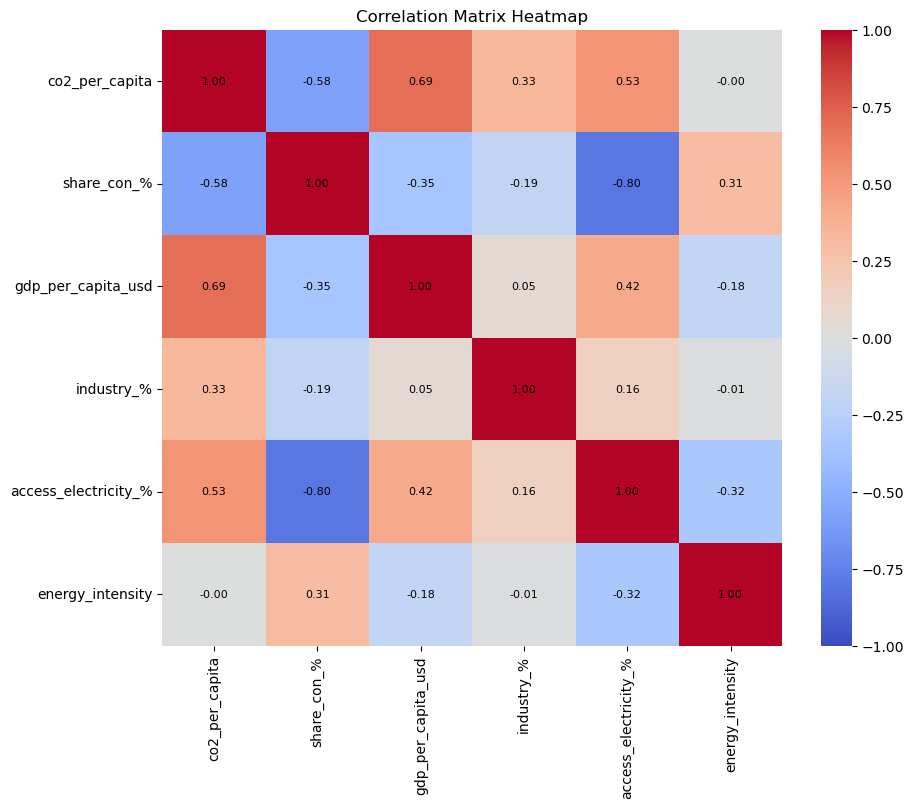

In [50]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
# Add annotations for all cells
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='black', fontsize=8)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Pairplot

/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcor

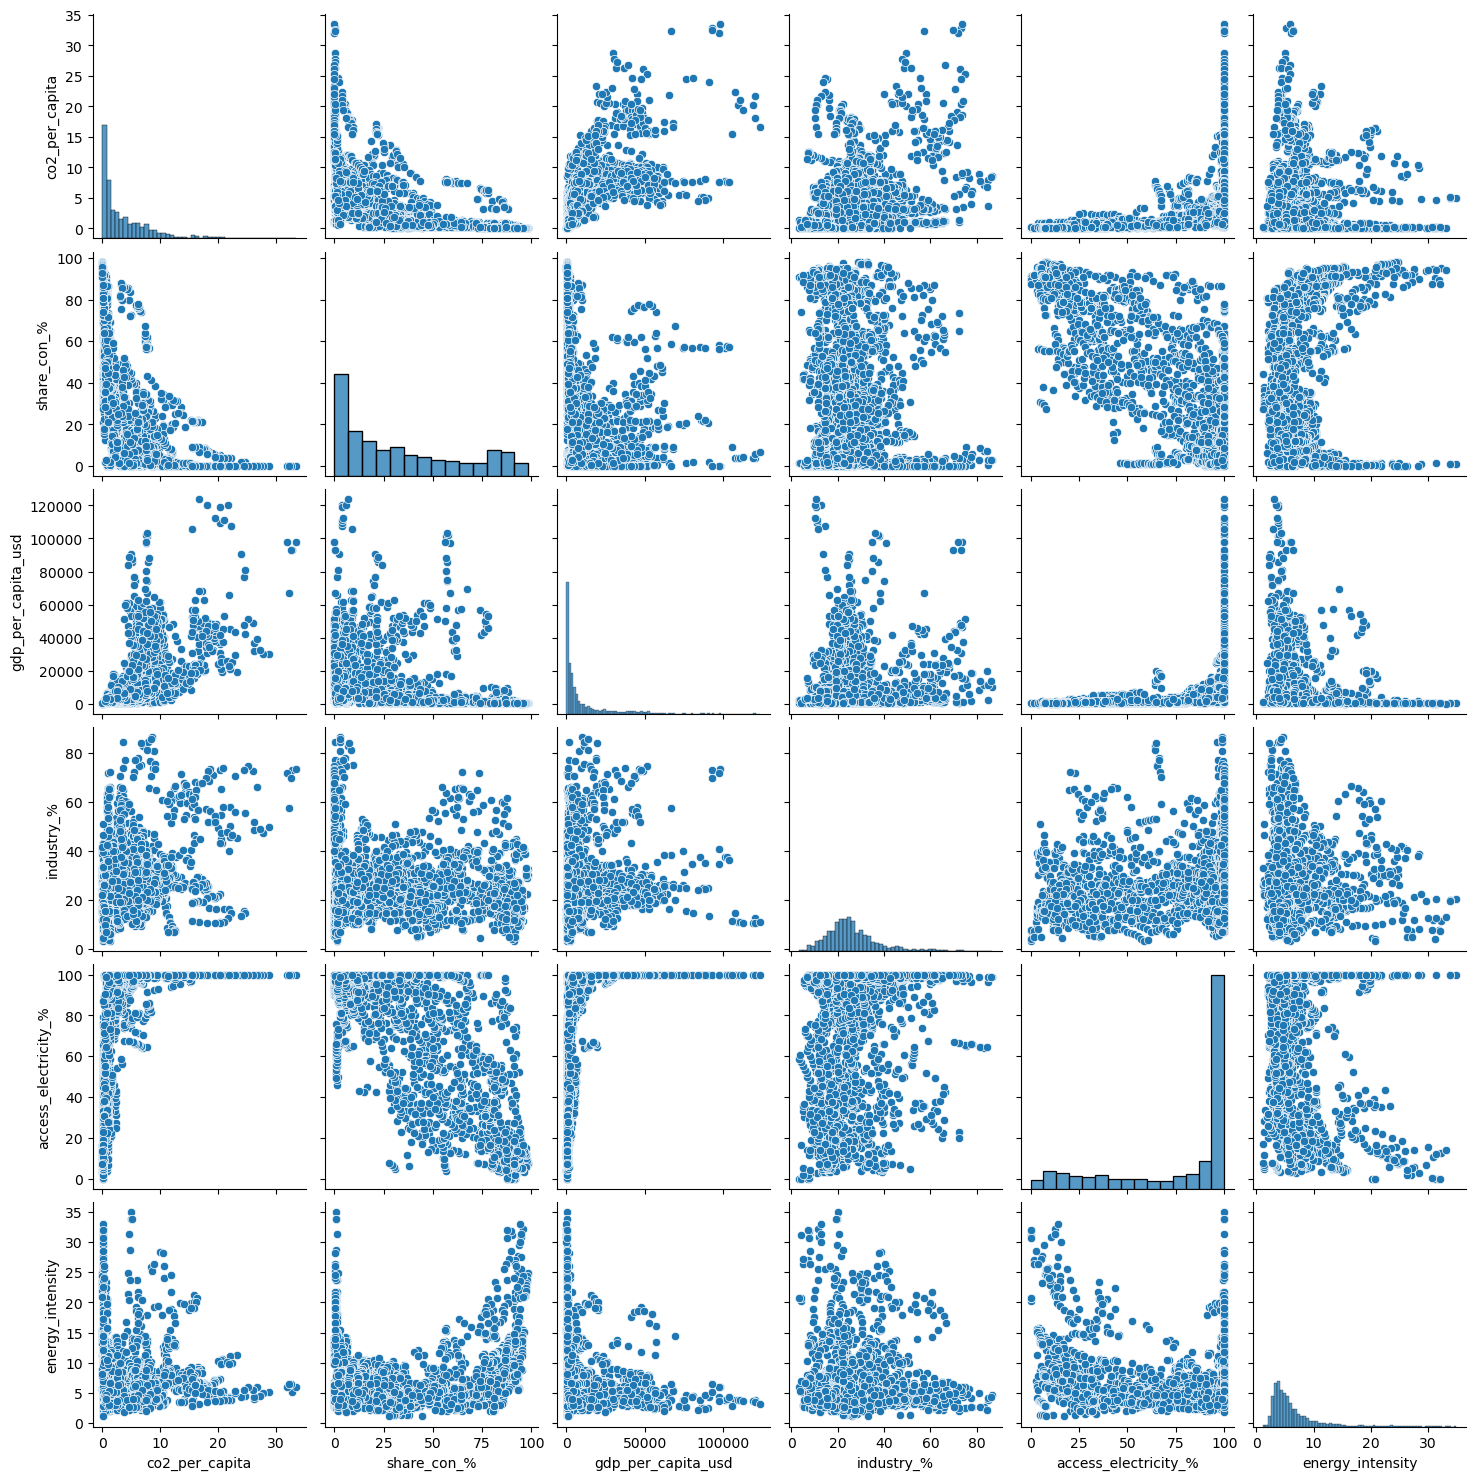

In [51]:
# Select the columns for the scatter plot matrix
selected_columns = ['co2_per_capita', 'share_con_%', 'gdp_per_capita_usd', 'industry_%', 'access_electricity_%', 'energy_intensity']

# Create the pair plot
sns.pairplot(merged_df[selected_columns])

# Display the plot
plt.show()

### Correlations

#### CO2_per_capita & share_con_%

In [52]:
# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(merged_df['co2_per_capita'],merged_df['share_con_%'])

print(f"The correlation is: {correlation}")
print(f"The p-value is: {p_value}")

The correlation is: -0.5823563795006419
The p-value is: 3.929266910722213e-266


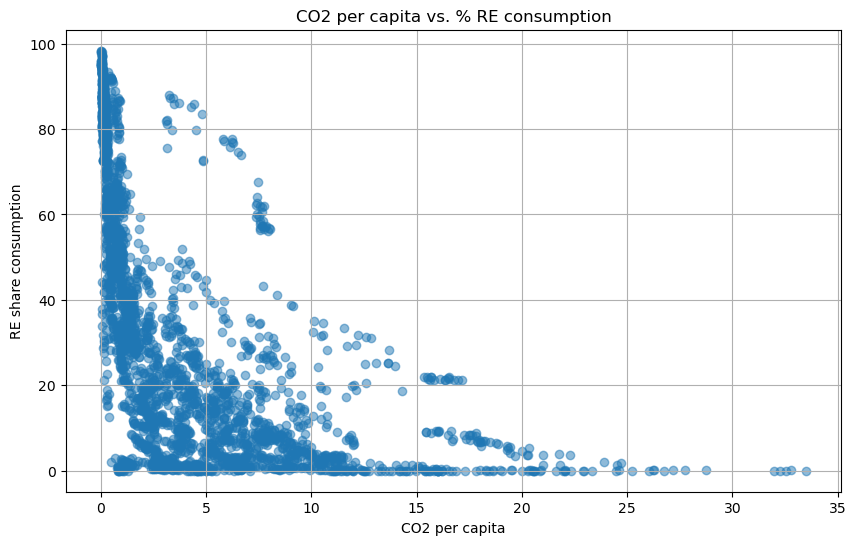

In [53]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['co2_per_capita'], merged_df['share_con_%'], alpha=0.5)
plt.title('CO2 per capita vs. % RE consumption')
plt.xlabel('CO2 per capita')
plt.ylabel('RE share consumption')
plt.grid(True)

# Show the plot
plt.show()

#### CO2_per_capita & GDP_per_capita

In [54]:
# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(merged_df['co2_per_capita'],merged_df['gdp_per_capita_usd'])

print(f"The correlation is: {correlation}")
print(f"The p-value is: {p_value}")

The correlation is: 0.6903152400548173
The p-value is: 0.0


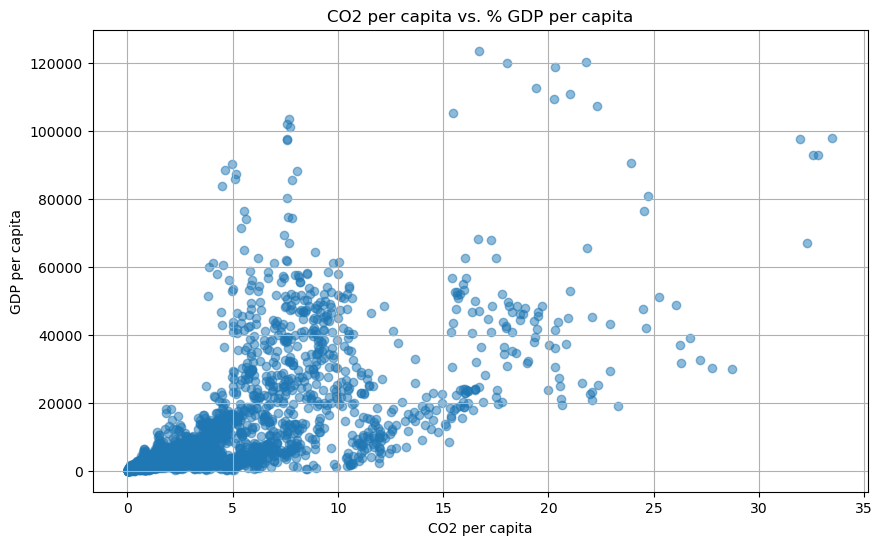

In [55]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['co2_per_capita'], merged_df['gdp_per_capita_usd'], alpha=0.5)
plt.title('CO2 per capita vs. % GDP per capita')
plt.xlabel('CO2 per capita')
plt.ylabel('GDP per capita')
plt.grid(True)

# Show the plot
plt.show()

#### CO2_per_capita & industry_%

In [56]:
# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(merged_df['co2_per_capita'],merged_df['industry_%'])

print(f"The correlation is: {correlation}")
print(f"The p-value is: {p_value}")

The correlation is: 0.32951187563952006
The p-value is: 2.794763569806935e-75


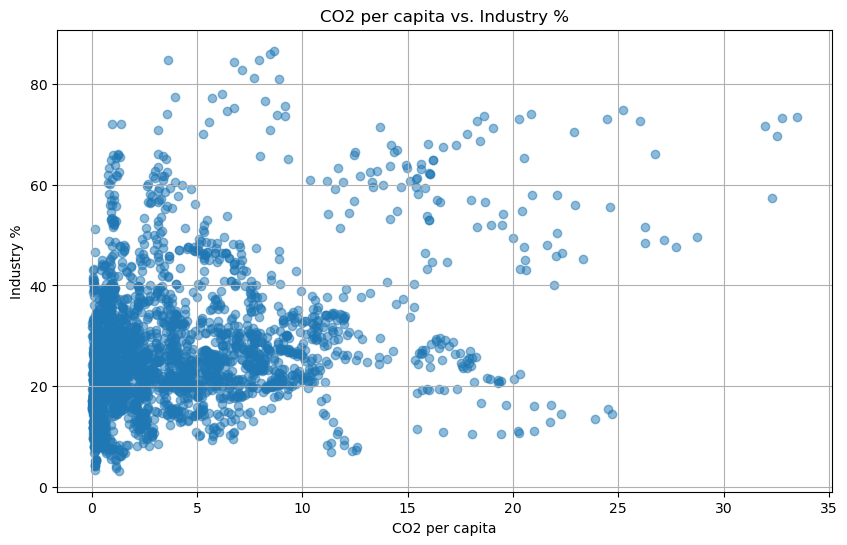

In [57]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['co2_per_capita'], merged_df['industry_%'], alpha=0.5)
plt.title('CO2 per capita vs. Industry %')
plt.xlabel('CO2 per capita')
plt.ylabel('Industry %')
plt.grid(True)

# Show the plot
plt.show()

#### CO2_per_capita & access_electricity_%

In [58]:
# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(merged_df['co2_per_capita'],merged_df['access_electricity_%'])

print(f"The correlation is: {correlation}")
print(f"The p-value is: {p_value}")

The correlation is: 0.531243026763671
The p-value is: 1.797416434874911e-213


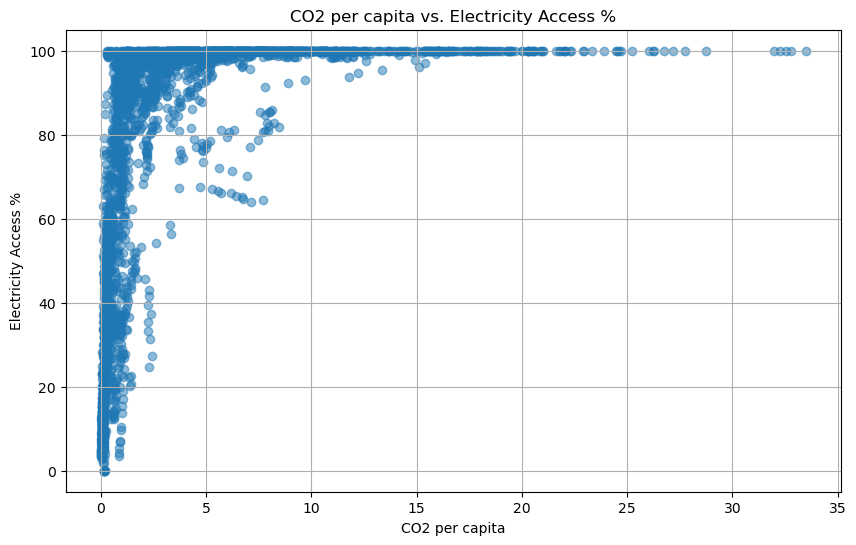

In [59]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['co2_per_capita'], merged_df['access_electricity_%'], alpha=0.5)
plt.title('CO2 per capita vs. Electricity Access %')
plt.xlabel('CO2 per capita')
plt.ylabel('Electricity Access %')
plt.grid(True)

# Show the plot
plt.show()

#### CO2_per_capita & energy_intensity

In [60]:
# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(merged_df['co2_per_capita'],merged_df['energy_intensity'])

print(f"The correlation is: {correlation}")
print(f"The p-value is: {p_value}")

The correlation is: -0.00317459863013236
The p-value is: 0.8635058598771437


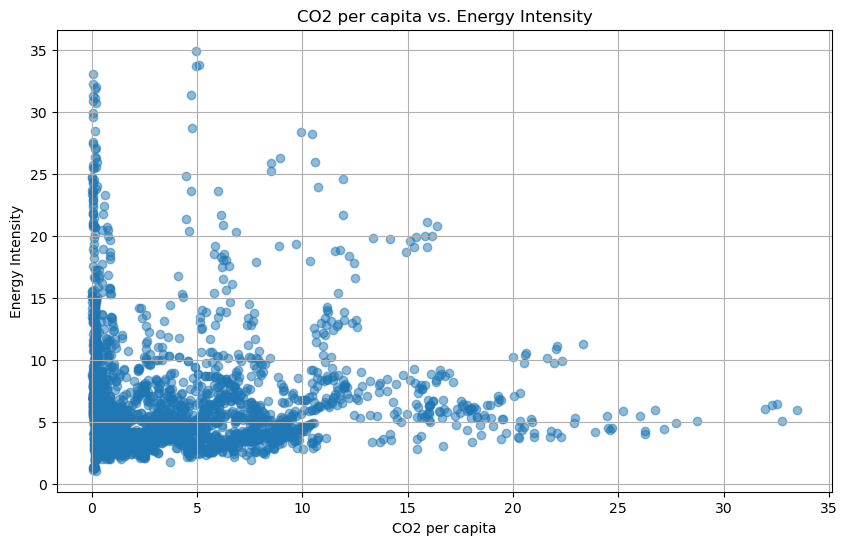

In [61]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['co2_per_capita'], merged_df['energy_intensity'], alpha=0.5)
plt.title('CO2 per capita vs. Energy Intensity')
plt.xlabel('CO2 per capita')
plt.ylabel('Energy Intensity')
plt.grid(True)

# Show the plot
plt.show()

#### GDP_per_capita & share_con_%

In [62]:
# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(merged_df['gdp_per_capita_usd'],merged_df['share_con_%'])

print(f"The correlation is: {correlation}")
print(f"The p-value is: {p_value}")

The correlation is: -0.34972508723043455
The p-value is: 3.427492842790751e-85


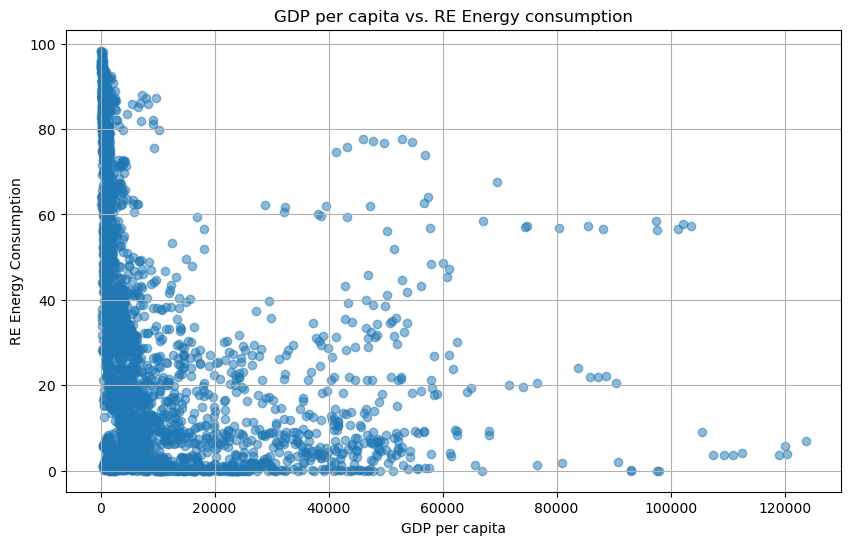

In [63]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['gdp_per_capita_usd'], merged_df['share_con_%'], alpha=0.5)
plt.title('GDP per capita vs. RE Energy consumption')
plt.xlabel('GDP per capita')
plt.ylabel('RE Energy Consumption')
plt.grid(True)

# Show the plot
plt.show()

### Regression

#### 2 variables

In [64]:
#Prepare data for modeling
#Access electricity doesn't make a difference
X = merged_df[['share_con_%', 'gdp_per_capita_usd']]
X = sm.add_constant(X)
y = merged_df['co2_per_capita']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         co2_per_capita   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2283.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:59:15   Log-Likelihood:                -7373.5
No. Observations:                2935   AIC:                         1.475e+04
Df Residuals:                    2932   BIC:                         1.477e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.3671      0

#### 4 variables

In [65]:
#Prepare data for modeling
#Access electricity doesn't make a difference
X = merged_df[['share_con_%', 'gdp_per_capita_usd','industry_%','energy_intensity']]
X = sm.add_constant(X)
y = merged_df['co2_per_capita']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         co2_per_capita   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1800.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        16:59:15   Log-Likelihood:                -6931.3
No. Observations:                2935   AIC:                         1.387e+04
Df Residuals:                    2930   BIC:                         1.390e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5462      0